<a href="https://colab.research.google.com/github/christopher-reed/tidytuesday/blob/master/2020/week_28/code/Coffee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**QUESTION: What countries produce the best coffee? How many defects does the coffee have?**

**Packages**

In [359]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imageio

**Cleaning and joining data**

In [360]:
#Read in data
df_arabica = pd.read_csv('https://raw.githubusercontent.com/jldbc/coffee-quality-database/master/data/arabica_data_cleaned.csv')
df_robusta = pd.read_csv('https://raw.githubusercontent.com/jldbc/coffee-quality-database/master/data/robusta_data_cleaned.csv')

#Troublesome column names in robusta!
df_robusta = df_robusta.rename(columns = {'Fragrance...Aroma':'Aroma',
                                          'Salt...Acid':'Acidity',
                                          'Bitter...Sweet':'Sweetness',
                                          'Mouthfeel':'Body',
                                          'Uniform.Cup':'Uniformity'
                                          })

#Concat dfs
df_coffee = pd.concat([df_arabica, df_robusta])

#Drop excess column
df_coffee = df_coffee.drop(columns = ['Unnamed: 0'])

#All columns lower case and underscore spaces instead of periods
columns = {c: c.lower().replace('.', '_') for c in df_coffee.columns}
df_coffee = df_coffee.rename(columns = columns)

#Dates
df_coffee['grading_date'] = pd.to_datetime(df_coffee['grading_date'])
df_coffee['expiration'] = pd.to_datetime(df_coffee['expiration'])
df_coffee.head()

#Total defects
df_coffee['total_defects'] = df_coffee['category_one_defects'] + df_coffee['category_two_defects']

**The coffee scores are all pretty close. It will be better/easier to convert them to zscores for visualization purposes.**

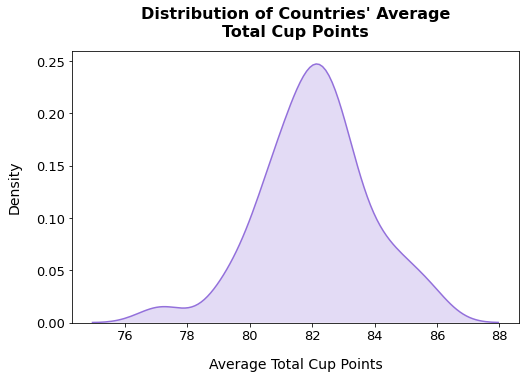

In [361]:
#Group by country and find the mean
df_coffee_country = df_coffee.groupby('country_of_origin').mean().reset_index()

#Create figure
fig, ax = plt.subplots(figsize = (8,5))
ax = sns.kdeplot(df_coffee_country['total_cup_points'],
                 color = 'mediumpurple',
                 legend = False,
                 shade = True,
                 label = 'Total Cup Points')

#Formatting
ax.set_title('Distribution of Countries\' Average\nTotal Cup Points', fontsize = 16, weight = 'bold', pad = 15)
ax.set_ylabel('Density', fontsize = 14, labelpad = 15)
ax.set_xlabel('Average Total Cup Points', fontsize = 14, labelpad = 15)
plt.tick_params(axis = 'both', labelsize = 13)

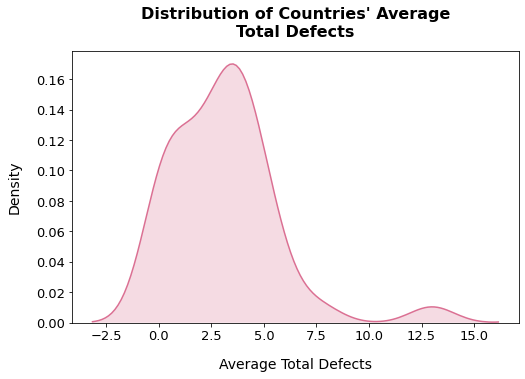

In [362]:
#Group by country and find the mean
df_coffee_country = df_coffee.groupby('country_of_origin').mean().reset_index()

#Create figure
fig, ax = plt.subplots(figsize = (8,5))
ax = sns.kdeplot(df_coffee_country['total_defects'],
                 color = 'palevioletred',
                 legend = False,
                 shade = True,
                 label = 'Total Cup Points')

#Formatting
ax.set_title('Distribution of Countries\' Average\nTotal Defects', fontsize = 16, weight = 'bold', pad = 15)
ax.set_ylabel('Density', fontsize = 14, labelpad = 15)
ax.set_xlabel('Average Total Defects', fontsize = 14, labelpad = 15)
plt.tick_params(axis = 'both', labelsize = 13)

**Function to normalize data.**

In [363]:
#Function to compute zscores for any column in df
def normalize(df, col):
  col_zscore = col + '_zscore'
  df[col_zscore] = (df[col] - df[col].mean()) / (df[col].std())

normalize(df_coffee_country, 'total_cup_points')
normalize(df_coffee_country, 'total_defects')

In [364]:
#Get array of countries that we can copy and paste into a list
#Probably a more pythonic way to edit individual items...
df_coffee_country.sort_values(by = 'total_cup_points_zscore')['country_of_origin'].values

array(['Haiti', 'Cote d?Ivoire', 'Honduras', 'Ecuador', 'Nicaragua',
       'Mauritius', 'Myanmar', 'Philippines', 'Mexico', 'India',
       'Vietnam', 'Malawi', 'United States (Puerto Rico)',
       'United States (Hawaii)', 'Burundi', 'Laos', 'Guatemala', 'Zambia',
       'Taiwan', 'Tanzania, United Republic Of', 'Brazil', 'Peru',
       'Indonesia', 'Thailand', 'Costa Rica', 'Rwanda', 'China',
       'El Salvador', 'Colombia', 'Uganda', 'Panama', 'Kenya',
       'United States', 'Japan', 'Ethiopia', 'Papua New Guinea'],
      dtype=object)

In [365]:
#Format the names manually
countries = ['Haiti', 'Cote d\'Ivoire', 'Honduras', 'Ecuador', 'Nicaragua',
       'Mauritius', 'Myanmar', 'Philippines', 'Mexico', 'India',
       'Vietnam', 'Malawi', 'Puerto Rico',
       'Hawaii', 'Burundi', 'Laos', 'Guatemala', 'Zambia',
       'Taiwan', 'Tanzania', 'Brazil', 'Peru',
       'Indonesia', 'Thailand', 'Costa Rica', 'Rwanda', 'China',
       'El Salvador', 'Colombia', 'Uganda', 'Panama', 'Kenya',
       'United States', 'Japan', 'Ethiopia', 'Papua New Guinea']

#How many countries? Will help with formating later.
len(countries)

36

In [366]:
df_coffee_country.head()

,country_of_origin,number_of_bags,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,total_cup_points,moisture,category_one_defects,quakers,category_two_defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters,total_defects,total_cup_points_zscore,total_defects_zscore
0,Brazil,231.318182,7.553106,7.573561,7.440530,7.511439,7.544545,7.531515,9.884924,9.853485,9.949394,7.562955,82.405909,0.082348,0.128788,0.446970,3.598485,1009.971429,1023.571429,1016.771429,3.727273,0.178058,0.246868
1,Burundi,260.000000,7.415000,7.460000,7.250000,7.415000,7.290000,7.415000,10.000000,10.000000,10.000000,7.580000,81.830000,0.060000,0.000000,0.000000,2.500000,1790.000000,1790.000000,1790.000000,2.500000,-0.152801,-0.233082
2,China,3.437500,7.641250,7.625625,7.484375,7.578125,7.573750,7.548125,9.958125,9.958125,9.916250,7.646875,82.927500,0.094375,0.000000,0.500000,4.000000,1463.125000,1463.125000,1463.125000,4.000000,0.477711,0.353523
3,Colombia,225.158470,7.653060,7.597104,7.524699,7.560000,7.609508,7.708415,9.934426,9.945355,9.952678,7.620546,83.106557,0.062022,0.377049,0.208791,1.939891,1515.640000,1655.640000,1585.640000,2.316940,0.580580,-0.304671
4,Costa Rica,203.019608,7.671373,7.537255,7.534510,7.573922,7.537451,7.637255,9.856275,9.869216,9.908431,7.663529,82.789020,0.083333,0.352941,0.117647,2.823529,1350.708696,1409.560870,1380.134783,3.176471,0.398155,0.031466


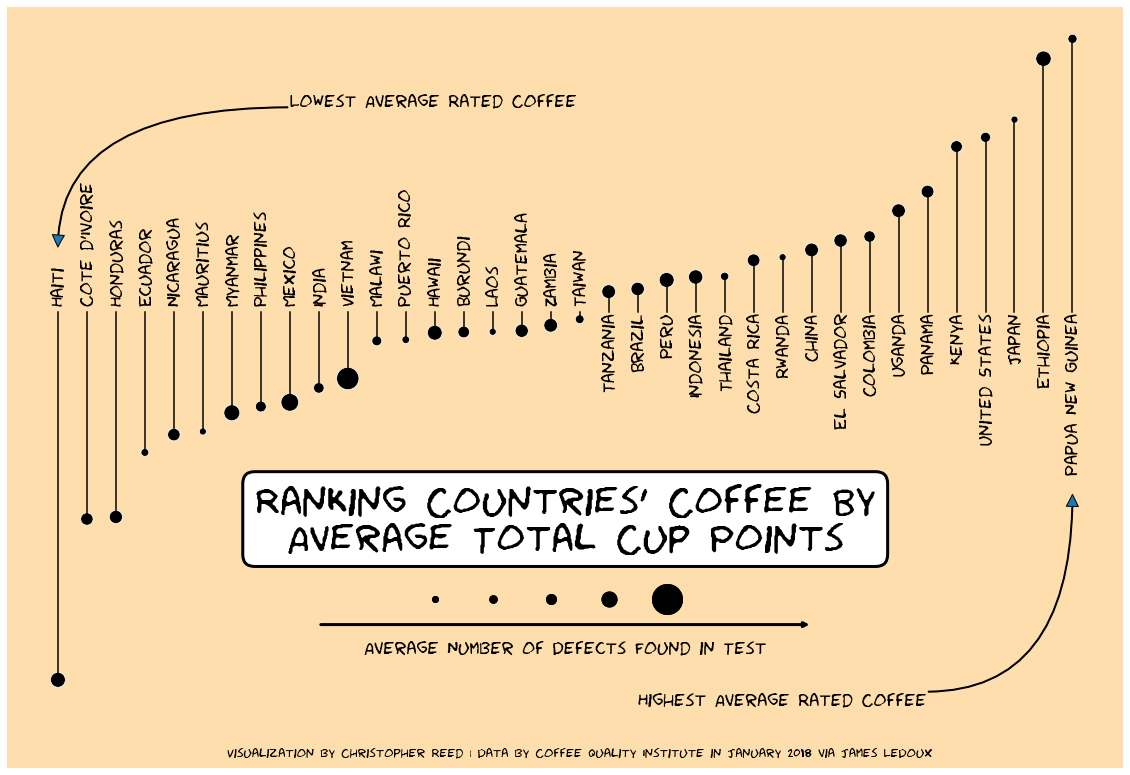

In [370]:
#################
##CREATE FIGURE##
#################

#Fig and axes
fig, ax = plt.subplots(figsize = (20,14))

#Plot stems. Order by cup point z scores. Add rotated county text.
for i, j in enumerate(df_coffee_country.sort_values(by = 'total_cup_points_zscore')['total_cup_points_zscore']):
  x_coords = (i, i)
  y_coords = (0, j)

  ax.plot(x_coords, y_coords, color = 'black')

  #Text
  #Negative value text
  if j < 0:
    ax.text(i,0.05, countries[i], fontsize = 18, rotation = 90, horizontalalignment = 'center', verticalalignment = 'bottom', family = 'fantasy')

  #Positive value text
  else:
    #Positive value labels
    ax.text(i,0, countries[i], fontsize = 18, rotation = 90, horizontalalignment = 'center', verticalalignment = 'top', family = 'fantasy')

#Scatterplot ontop of stems
ax = sns.scatterplot(x = df_coffee_country.index,
                     y = 'total_cup_points_zscore',
                     size = 'total_defects_zscore',
                     sizes = (50,500),
                     legend = False,
                     color = 'black',
                     data = df_coffee_country.sort_values(by = 'total_cup_points_zscore'))

##########################
##TITLES AND ANNOTATIONS##
##########################

#Main title
ax.text(17.5,-1.8,'Ranking Countries\' Coffee By\nAverage Total Cup Points',
        fontsize = 40,
        horizontalalignment = 'center',
        family = 'fantasy',
        bbox = {'facecolor': 'white',
                'edgecolor':'black',
                'boxstyle':'round',
                'lw':3})

#Annotation for lowest average rated coffee
ax.annotate('Lowest Average Rated Coffee',
            xy = (0,0.5), xytext = (8, 1.6),
            fontsize = 18,
            family = 'fantasy', 
            arrowprops = {'width':1,
                          'connectionstyle': 'angle3, angleA = 0, angleB =9 0'})

#Annotation for highest average rated coffee
ax.annotate('Highest Average Rated Coffee',
            xy = (35,-1.4), xytext = (20, -3),
            fontsize = 18,
            family = 'fantasy', 
            arrowprops = {'width':1,
                          'connectionstyle': 'angle3, angleA = 0, angleB = 90'})

###################
##AXES FORMATTING##
###################

#Remove axis lines (but keeping axis for facecolor)
for i in ['right', 'top', 'left', 'bottom']:
  ax.spines[i].set_visible(False)

#Remove ticks
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

#Axis labels
ax.set_ylabel('')

#Change background color
ax.set_facecolor('navajowhite')

##########
##Legend##
##########

#Circles
for i in range(5):
  x_pos = 23 - (2* (i+1))
  radius = 30 / (2* (i+1))
  ax.plot(x_pos, -2.2, 'o', color = 'black', ms = radius * 2)
  ax.plot(x_pos, -2.2, 'o', color = 'black', ms = radius * 2)

#Arrow
ax.annotate('', xytext = (9, -2.4), xy = (26, -2.4), color = 'black', arrowprops = {'arrowstyle':'->',
                                                                                    'lw':3})
#Text
ax.text(17.5,-2.6,
        'Average Number of Defects Found in Test',
        fontsize = 18,
        horizontalalignment = 'center',
        family = 'fantasy')

###########
##CREDITS##
###########
ax.text(18, -3.4,
        'Visualization by Christopher Reed | Data by Coffee Quality Institute in January 2018 via James LeDoux',
        weight = 'bold',
        fontsize = 13,
        family = 'fantasy',
        horizontalalignment = 'center')

#For extra space to cover credits
ax.set_ylim(bottom = -3.5)

#########################
##SAVING IMAGES FOR GIF##
#########################
images_dir = '/content/drive/My Drive/TidyTuesday/week_28'
plt.savefig(f"{images_dir}/fig53.png")

**Code to create gif.**

In [373]:

images = []
for i in range(53):

  #These images are too small!
  if i <4:
    continue

  else:
    filename = '/content/drive/My Drive/TidyTuesday/week_28/fig' + str(i+1) + '.png'

    images.append(imageio.imread(filename))

#Frame duration 0.5 seconds
imageio.mimsave('movie.gif', images, duration = 0.5)